<img src="https://webna.ir/wp-content/uploads/2018/08/%D9%85%DA%A9%D8%AA%D8%A8-%D8%AE%D9%88%D9%86%D9%87.png" width=50% />

<div class="alert alert-block alert-success">
    <h1 align="center">Machine Learning in Python</h1>
    <h3 align="center">Project1</h3>
</div>

<img src = "https://www.eesc.europa.eu/sites/default/files/styles/large/public/images/shutterstock_1642888921.jpg?itok=P9-6YhGd" width=50%>

## Importing the libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeRegressor
import xgboost as sgb 
from sklearn.impute import SimpleImputer
import seaborn as sns
import warnings
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.metrics import f1_score
from sklearn.ensemble import RandomForestClassifier
warnings.filterwarnings('ignore')

## Load and Prepare Data

In [2]:
corona = pd.read_csv("country_vaccinations.csv")

## EDA

In [3]:
corona.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31240 entries, 0 to 31239
Data columns (total 15 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   country                              31240 non-null  object 
 1   iso_code                             31240 non-null  object 
 2   date                                 31240 non-null  object 
 3   total_vaccinations                   17451 non-null  float64
 4   people_vaccinated                    16554 non-null  float64
 5   people_fully_vaccinated              13795 non-null  float64
 6   daily_vaccinations_raw               14421 non-null  float64
 7   daily_vaccinations                   30948 non-null  float64
 8   total_vaccinations_per_hundred       17451 non-null  float64
 9   people_vaccinated_per_hundred        16554 non-null  float64
 10  people_fully_vaccinated_per_hundred  13795 non-null  float64
 11  daily_vaccinations_per_milli

In [4]:
corona.isnull().sum()

country                                    0
iso_code                                   0
date                                       0
total_vaccinations                     13789
people_vaccinated                      14686
people_fully_vaccinated                17445
daily_vaccinations_raw                 16819
daily_vaccinations                       292
total_vaccinations_per_hundred         13789
people_vaccinated_per_hundred          14686
people_fully_vaccinated_per_hundred    17445
daily_vaccinations_per_million           292
vaccines                                   0
source_name                                0
source_website                             0
dtype: int64

In [5]:
keshvar = corona.country.unique()
count = 0
for i in keshvar:
    count += 1
print (count)
   

218


In [6]:
corona.head()

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
0,Afghanistan,AFG,2021-02-22,0.0,0.0,NaN,NaN,NaN,0.0,0.0,NaN,NaN,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
1,Afghanistan,AFG,2021-02-23,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
2,Afghanistan,AFG,2021-02-24,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
3,Afghanistan,AFG,2021-02-25,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
4,Afghanistan,AFG,2021-02-26,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/


In [7]:
vaccine = corona.vaccines.count()
vaccine

31240

In [8]:
vac = corona.vaccines.unique()
coun = 0
for j in vac:
    coun += 1
print (coun)

53


In [9]:
corona.query('iso_code == "AFG" and date != "2021-02-22" ')

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
1,Afghanistan,AFG,2021-02-23,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
2,Afghanistan,AFG,2021-02-24,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
3,Afghanistan,AFG,2021-02-25,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
4,Afghanistan,AFG,2021-02-26,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
5,Afghanistan,AFG,2021-02-27,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
138,Afghanistan,AFG,2021-07-10,NaN,NaN,NaN,NaN,7292.0,NaN,NaN,NaN,187.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
139,Afghanistan,AFG,2021-07-11,962093.0,742934.0,219159.0,NaN,7455.0,2.47,1.91,0.56,192.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
140,Afghanistan,AFG,2021-07-12,NaN,NaN,NaN,NaN,9588.0,NaN,NaN,NaN,246.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
141,Afghanistan,AFG,2021-07-13,NaN,NaN,NaN,NaN,11201.0,NaN,NaN,NaN,288.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/


## Data Preprocessing

In [10]:
corona.drop(columns=['country', 'date', 'iso_code', 'source_name', 'source_website'], axis = 1, inplace=True)

In [11]:
corona.drop(columns=['vaccines'], axis = 1, inplace=True)

In [12]:
corona

,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million
0,0.0,0.0,NaN,NaN,NaN,0.00,0.00,NaN,NaN
1,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0
2,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0
3,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0
4,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0
...,...,...,...,...,...,...,...,...,...
31235,1491397.0,895980.0,595417.0,NaN,18598.0,10.03,6.03,4.01,1251.0
31236,1531868.0,926312.0,605556.0,40471.0,23205.0,10.31,6.23,4.07,1561.0
31237,1575539.0,955656.0,619883.0,43671.0,27567.0,10.60,6.43,4.17,1855.0
31238,1613640.0,988746.0,624894.0,38101.0,30698.0,10.86,6.65,4.20,2065.0


In [13]:
corona.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31240 entries, 0 to 31239
Data columns (total 9 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   total_vaccinations                   17451 non-null  float64
 1   people_vaccinated                    16554 non-null  float64
 2   people_fully_vaccinated              13795 non-null  float64
 3   daily_vaccinations_raw               14421 non-null  float64
 4   daily_vaccinations                   30948 non-null  float64
 5   total_vaccinations_per_hundred       17451 non-null  float64
 6   people_vaccinated_per_hundred        16554 non-null  float64
 7   people_fully_vaccinated_per_hundred  13795 non-null  float64
 8   daily_vaccinations_per_million       30948 non-null  float64
dtypes: float64(9)
memory usage: 2.1 MB


In [14]:
x = corona.copy()
x.head()
x.isnull().sum()
x = x.values
imputer = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
imputer.fit(x[:,0:9])
z = x[:, 0:9]
z = imputer.transform(z)

In [16]:
corona1 = pd.DataFrame(z)
corona1.isnull().count()

0    31240
1    31240
2    31240
3    31240
4    31240
5    31240
6    31240
7    31240
8    31240
dtype: int64

In [17]:
corona1

,0,1,2,3,4,5,6,7,8
0,0.0,0.0,1.0,0.0,0.0,0.00,0.00,0.00,517.0
1,0.0,0.0,1.0,0.0,1367.0,0.00,0.00,0.00,35.0
2,0.0,0.0,1.0,0.0,1367.0,0.00,0.00,0.00,35.0
3,0.0,0.0,1.0,0.0,1367.0,0.00,0.00,0.00,35.0
4,0.0,0.0,1.0,0.0,1367.0,0.00,0.00,0.00,35.0
...,...,...,...,...,...,...,...,...,...
31235,1491397.0,895980.0,595417.0,0.0,18598.0,10.03,6.03,4.01,1251.0
31236,1531868.0,926312.0,605556.0,40471.0,23205.0,10.31,6.23,4.07,1561.0
31237,1575539.0,955656.0,619883.0,43671.0,27567.0,10.60,6.43,4.17,1855.0
31238,1613640.0,988746.0,624894.0,38101.0,30698.0,10.86,6.65,4.20,2065.0


In [18]:
corona1.rename(columns={0:"total_vaccinations", 1:"people_vaccinated", 2:"people_fully_vaccinated", 3:"daily_vaccinations_raw", 4:"daily_vaccinations", 5:"total_vaccinations_per_hundred", 6:"people_vaccinated_per_hundred", 7:"people_fully_vaccinated_per_hundred", 8:"daily_vaccinations_per_million"}, inplace=True)

In [19]:
corona1

,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million
0,0.0,0.0,1.0,0.0,0.0,0.00,0.00,0.00,517.0
1,0.0,0.0,1.0,0.0,1367.0,0.00,0.00,0.00,35.0
2,0.0,0.0,1.0,0.0,1367.0,0.00,0.00,0.00,35.0
3,0.0,0.0,1.0,0.0,1367.0,0.00,0.00,0.00,35.0
4,0.0,0.0,1.0,0.0,1367.0,0.00,0.00,0.00,35.0
...,...,...,...,...,...,...,...,...,...
31235,1491397.0,895980.0,595417.0,0.0,18598.0,10.03,6.03,4.01,1251.0
31236,1531868.0,926312.0,605556.0,40471.0,23205.0,10.31,6.23,4.07,1561.0
31237,1575539.0,955656.0,619883.0,43671.0,27567.0,10.60,6.43,4.17,1855.0
31238,1613640.0,988746.0,624894.0,38101.0,30698.0,10.86,6.65,4.20,2065.0


In [20]:
print (type(corona1))

<class 'pandas.core.frame.DataFrame'>


In [21]:
x = corona1['total_vaccinations'].head(100)
y = corona1['people_vaccinated'].head(100)
z = corona1['people_fully_vaccinated_per_hundred'].head(100)

## Strorytelling - Visualization

<AxesSubplot:xlabel='total_vaccinations', ylabel='people_vaccinated'>

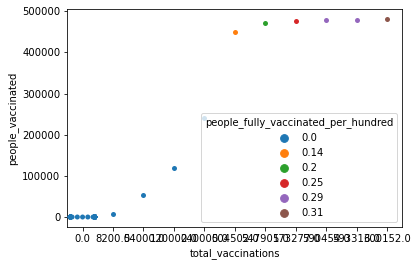

In [22]:
sns.swarmplot(x = x, y = y, hue = z, data = corona1)

## Train your model

In [24]:
x = corona1.drop(columns = ['total_vaccinations'], axis = 1)
x = x.head(500)
y = corona1['total_vaccinations']
y = y.head(500)
x_train,x_test,y_train,y_test = train_test_split(x, y, test_size=0.3, random_state=1)

In [25]:
x_test

,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million
304,515884.0,365028.0,0.0,6355.0,30.61,17.93,12.68,2208.0
340,0.0,1.0,0.0,3748.0,0.00,0.00,0.00,85.0
47,0.0,1.0,0.0,5143.0,0.00,0.00,0.00,132.0
67,0.0,1.0,0.0,13921.0,0.00,0.00,0.00,358.0
479,0.0,1.0,0.0,81.0,0.00,0.00,0.00,1048.0
...,...,...,...,...,...,...,...,...
331,30.0,1.0,30.0,30.0,0.00,0.00,0.00,1.0
197,0.0,1.0,0.0,897.0,0.00,0.00,0.00,312.0
95,0.0,1.0,0.0,5907.0,0.00,0.00,0.00,152.0
122,0.0,1.0,0.0,13264.0,0.00,0.00,0.00,341.0


# Feature Scalling

In [26]:
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)

In [27]:
rfc = RandomForestClassifier(criterion='entropy', random_state=42)

In [28]:
rfc.fit(x_train,y_train)

RandomForestClassifier(criterion='entropy', random_state=42)

In [45]:
rfc_pred_train = rfc.predict(x_train)

<class 'numpy.ndarray'>


(350,)

In [61]:
f1_score(y_train,rfc_pred_train,average='macro')

1.0

## Test the model and show the metrics

In [59]:
rfc_pred_test = rfc.predict(x_test)

In [64]:
f1_score(y_test, rfc_pred_test, average='micro')*100

67.33333333333333

In [65]:
f1_score(y_test, rfc_pred_test, average='weighted')*100

65.07814992025519

In [55]:
rfc.feature_importances_

array([0.11250823, 0.05884735, 0.17440502, 0.10776879, 0.23574637,
       0.1203862 , 0.0479893 , 0.14234873])

## Send us the Result (Maktabkhoone)